<a href="https://colab.research.google.com/github/JoyIbeh/Assignment-one/blob/main/GROUP_NINE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP NINE EMPLOYEE DATA PROJECT

In [ ]:
#importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")

In [ ]:
# Loading the dataset

In [ ]:
filepath = r'C:\dataset\employee_dataset.csv'
er = pd.read_csv(filepath)
# er represent the variable holding the employee reacord

In [ ]:
er.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,6/12/2006,10/13/2012
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,7/19/2000,9/18/2010
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2/3/2015,2/3/2015
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,2/8/1982,5/25/1991
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,6/19/1989,10/22/1994


In [ ]:
# understanding the data

In [ ]:
er.describe()

,UNIQUE_ID,BASE_SALARY
count,2000.000000,1886.000000
mean,999.500000,55767.931601
std,577.494589,21693.706679
min,0.000000,24960.000000
25%,499.750000,40170.000000
50%,999.500000,54461.000000
75%,1499.250000,66614.000000
max,1999.000000,275000.000000


In [ ]:
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [ ]:
er.columns

Index(['UNIQUE_ID', 'POSITION_TITLE', 'DEPARTMENT', 'BASE_SALARY', 'RACE',
       'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS', 'HIRE_DATE',
       'JOB_DATE'],
      dtype='object')

In [ ]:
#Checking for empty column

In [ ]:
missing_values = er.isna().sum()

In [ ]:
print(missing_values)

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64


In [ ]:
#Filling up the empty roles

In [ ]:
#Filling up the salary column with zero
er['BASE_SALARY'] = pd.Series(er['BASE_SALARY']).fillna(0)

In [ ]:
er.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,6/12/2006,10/13/2012
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,7/19/2000,9/18/2010
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2/3/2015,2/3/2015
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,2/8/1982,5/25/1991
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,6/19/1989,10/22/1994


In [ ]:
#Filling up the salary column with NA
er['RACE'] = pd.Series(er['RACE']).fillna('NA')

In [ ]:
er.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,6/12/2006,10/13/2012
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,7/19/2000,9/18/2010
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2/3/2015,2/3/2015
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,2/8/1982,5/25/1991
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,6/19/1989,10/22/1994


In [ ]:
#Checkinng for duplicate

In [ ]:
duplicated_value = er.duplicated()

In [ ]:
print(duplicated_value)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool


In [ ]:
RACE = er['RACE'].unique()

# DATA CLEANING

In [ ]:
er['RACE'].unique()

array(['Hispanic/Latino', 'White', 'Black or African American',
       'Asian/Pacific Islander', 'NA',
       'American Indian or Alaskan Native', 'Others'], dtype=object)

In [ ]:
#replacing the or with /
er['RACE'] = er['RACE'].str.replace('or','/')

In [ ]:
er['RACE'].unique()

array(['Hispanic/Latino', 'White', 'Black / African American',
       'Asian/Pacific Islander', 'NA', 'American Indian / Alaskan Native',
       'Others'], dtype=object)

In [ ]:
#removing whitespce
er['RACE'] = er['RACE'].str.replace(' / ','/')

In [ ]:
er['RACE'].unique()

array(['Hispanic/Latino', 'White', 'Black/African American',
       'Asian/Pacific Islander', 'NA', 'American Indian/Alaskan Native',
       'Others'], dtype=object)

In [ ]:
er['DEPARTMENT'].unique()

array(['Municipal Courts Department', 'Library',
       'Houston Police Department-HPD', 'Houston Fire Department (HFD)',
       'General Services Department', 'Public Works & Engineering-PWE',
       'Houston Airport System (HAS)', 'Health & Human Services',
       'Finance', 'Fleet Management Department', 'Solid Waste Management',
       'City Council', 'Human Resources Dept.',
       'Houston Emergency Center (HEC)', 'Parks & Recreation',
       "City Controller's Office", 'Legal Department',
       'Houston Information Tech Svcs', 'Housing and Community Devp.',
       'Dept of Neighborhoods (DON)', 'Admn. & Regulatory Affairs',
       "Mayor's Office", 'Convention and Entertainment',
       'Planning & Development'], dtype=object)

In [ ]:
er['DEPARTMENT'] = er['DEPARTMENT'].str.strip( "(" )

In [ ]:
er['DEPARTMENT'] = er['DEPARTMENT'].str.replace( '(','-' )

C:\Users\JOY\AppData\Local\Temp\ipykernel_12040\1055904179.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  er['DEPARTMENT'] = er['DEPARTMENT'].str.replace( '(','-' )


In [ ]:
er['DEPARTMENT'].unique()

array(['Municipal Courts Department', 'Library',
       'Houston Police Department-HPD', 'Houston Fire Department -HFD',
       'General Services Department', 'Public Works & Engineering-PWE',
       'Houston Airport System -HAS', 'Health & Human Services',
       'Finance', 'Fleet Management Department', 'Solid Waste Management',
       'City Council', 'Human Resources Dept',
       'Houston Emergency Center -HEC', 'Parks & Recreation',
       "City Controller's Office", 'Legal Department',
       'Houston Information Tech Svcs', 'Housing and Community Devp',
       'Dept of Neighborhoods -DON', 'Admn. & Regulatory Affairs',
       "Mayor's Office", 'Convention and Entertainment',
       'Planning & Development'], dtype=object)

In [ ]:
er['EMPLOYMENT_TYPE'].unique()

array(['Full Time', 'Part Time 30', 'Part Time', 'Temporary',
       'HFD Deferred Term'], dtype=object)

In [ ]:
er['EMPLOYMENT_TYPE'] = er['EMPLOYMENT_TYPE'].str.replace('Part Time 30','Part Time')

In [ ]:
er['EMPLOYMENT_TYPE'].unique()

array(['Full Time', 'Part Time', 'Temporary', 'HFD Deferred Term'],
      dtype=object)

# DATA VISUALIZATION

QUE 1A. Distribution by Race/Ethnicity:

- What is the racial/ethnic composition of the workforce?

In [ ]:
#Getting the unique value()

In [ ]:
race_dist=er['RACE'].unique()

In [ ]:
race_dist

array(['Hispanic/Latino', 'White', 'Black/African American',
       'Asian/Pacific Islander', 'NA', 'American Indian/Alaskan Native',
       'Others'], dtype=object)

In [ ]:
race_counts = er['RACE'].value_counts()

In [ ]:
race_counts

Black/African American            700
White                             665
Hispanic/Latino                   480
Asian/Pacific Islander            107
NA                                 35
American Indian/Alaskan Native     11
Others                              2
Name: RACE, dtype: int64

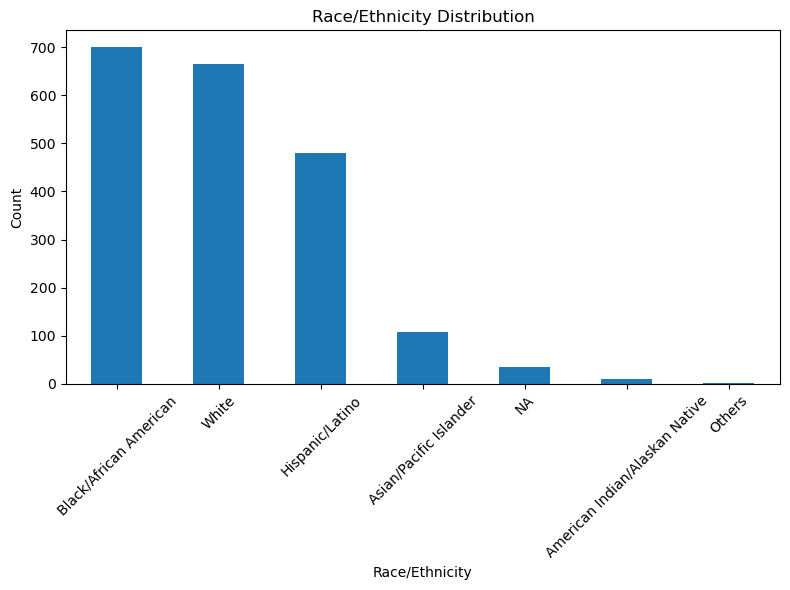

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
race_counts.plot(kind='bar')
plt.title('Race/Ethnicity Distribution')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Are there any significant disparities in the representation of different racial/ethnic groups across departments or positions?

In [ ]:
#grouping the department column and RACE column

In [ ]:
departments=er['DEPARTMENT'].value_counts()

In [ ]:
departments

Houston Police Department-HPD     638
Houston Fire Department -HFD      384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System -HAS       106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept               24
Houston Emergency Center -HEC      23
Housing and Community Devp         22
General Services Department        22
Legal Department                   17
Dept of Neighborhoods -DON         17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
City Controller's Office            5
Mayor's Office                      5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [ ]:
#Grouping the departments

In [ ]:
grouped = er.groupby(['DEPARTMENT', 'RACE'])

In [ ]:
#Calculate representation of each racial/ethnic group within each department or position
representation = grouped.size().unstack()

In [ ]:
representation

RACE,American Indian/Alaskan Native,Asian/Pacific Islander,Black/African American,Hispanic/Latino,NA,Others,White
DEPARTMENT,,,,,,,
Admn. & Regulatory Affairs,NaN,3.0,12.0,6.0,3.0,NaN,5.0
City Controller's Office,NaN,1.0,3.0,1.0,NaN,NaN,NaN
City Council,NaN,NaN,3.0,2.0,2.0,NaN,4.0
Convention and Entertainment,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Dept of Neighborhoods -DON,1.0,NaN,10.0,5.0,NaN,NaN,1.0
Finance,NaN,NaN,5.0,4.0,1.0,NaN,NaN
Fleet Management Department,NaN,1.0,14.0,9.0,2.0,NaN,10.0
General Services Department,NaN,NaN,5.0,10.0,NaN,NaN,7.0
Health & Human Services,3.0,11.0,53.0,27.0,2.0,2.0,12.0


In [ ]:
# Assuming 'representation' is your DataFrame containing representation data
representation = representation.fillna(0)

In [ ]:
representation

RACE,American Indian/Alaskan Native,Asian/Pacific Islander,Black/African American,Hispanic/Latino,NA,Others,White
DEPARTMENT,,,,,,,
Admn. & Regulatory Affairs,0.0,3.0,12.0,6.0,3.0,0.0,5.0
City Controller's Office,0.0,1.0,3.0,1.0,0.0,0.0,0.0
City Council,0.0,0.0,3.0,2.0,2.0,0.0,4.0
Convention and Entertainment,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Dept of Neighborhoods -DON,1.0,0.0,10.0,5.0,0.0,0.0,1.0
Finance,0.0,0.0,5.0,4.0,1.0,0.0,0.0
Fleet Management Department,0.0,1.0,14.0,9.0,2.0,0.0,10.0
General Services Department,0.0,0.0,5.0,10.0,0.0,0.0,7.0
Health & Human Services,3.0,11.0,53.0,27.0,2.0,2.0,12.0


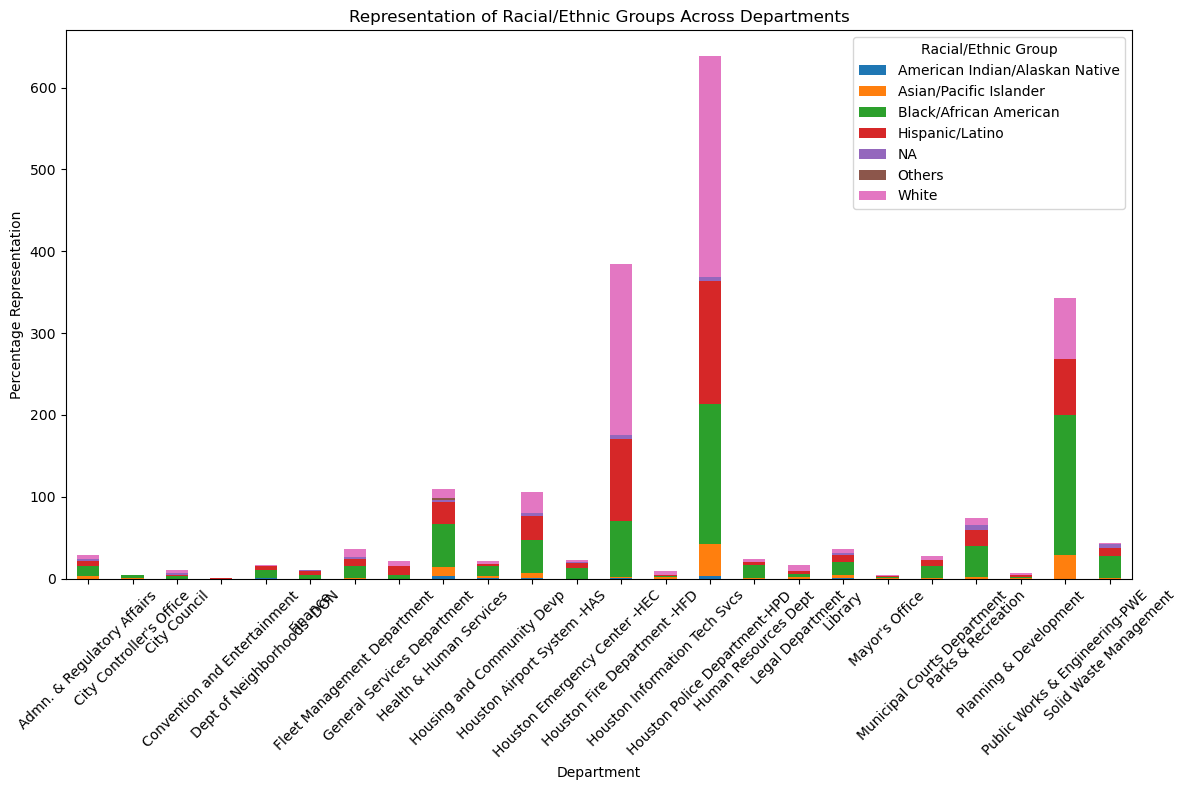

In [ ]:
representation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Representation of Racial/Ethnic Groups Across Departments')
plt.xlabel('Department')
plt.ylabel('Percentage Representation')
plt.xticks(rotation=45)
plt.legend(title='Racial/Ethnic Group')
plt.tight_layout()
plt.show()

# Gender Representation:

What is the racial/ethnic composition of the workforce?

In [ ]:
gender = er['GENDER'].value_counts()

In [ ]:
gender

Male      1397
Female     603
Name: GENDER, dtype: int64

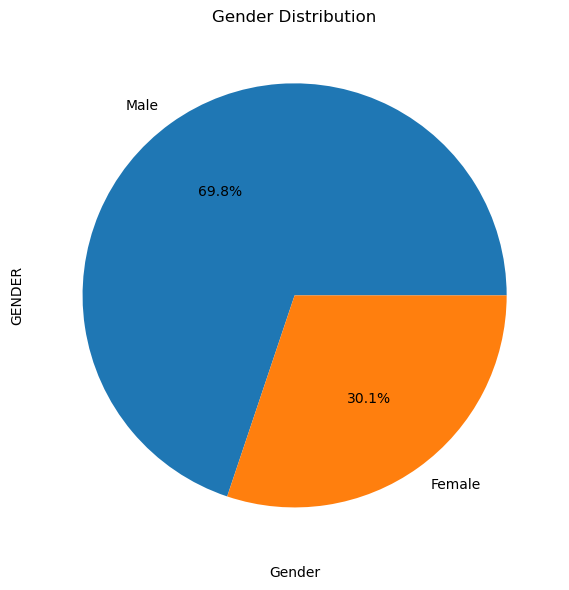

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
gender.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

In [ ]:
#Are there any significant disparities in the representation of
#different racial/ethnic groups across departments or positions?

In [ ]:
gender_representation = er.groupby(['DEPARTMENT','GENDER'])

NameError: name 'er' is not defined

In [ ]:
gender_representation_per_department = gender_representation.size().unstack()

In [ ]:
gender_representation_per_department

GENDER,Female,Male
DEPARTMENT,,
Admn. & Regulatory Affairs,22.0,7.0
City Controller's Office,4.0,1.0
City Council,7.0,4.0
Convention and Entertainment,1.0,NaN
Dept of Neighborhoods -DON,8.0,9.0
Finance,4.0,6.0
Fleet Management Department,3.0,33.0
General Services Department,2.0,20.0
Health & Human Services,83.0,27.0


In [ ]:
gender_representation_per_departmen=gender_representation_per_department.fillna(0)

NameError: name 'gender_representation_per_department' is not defined

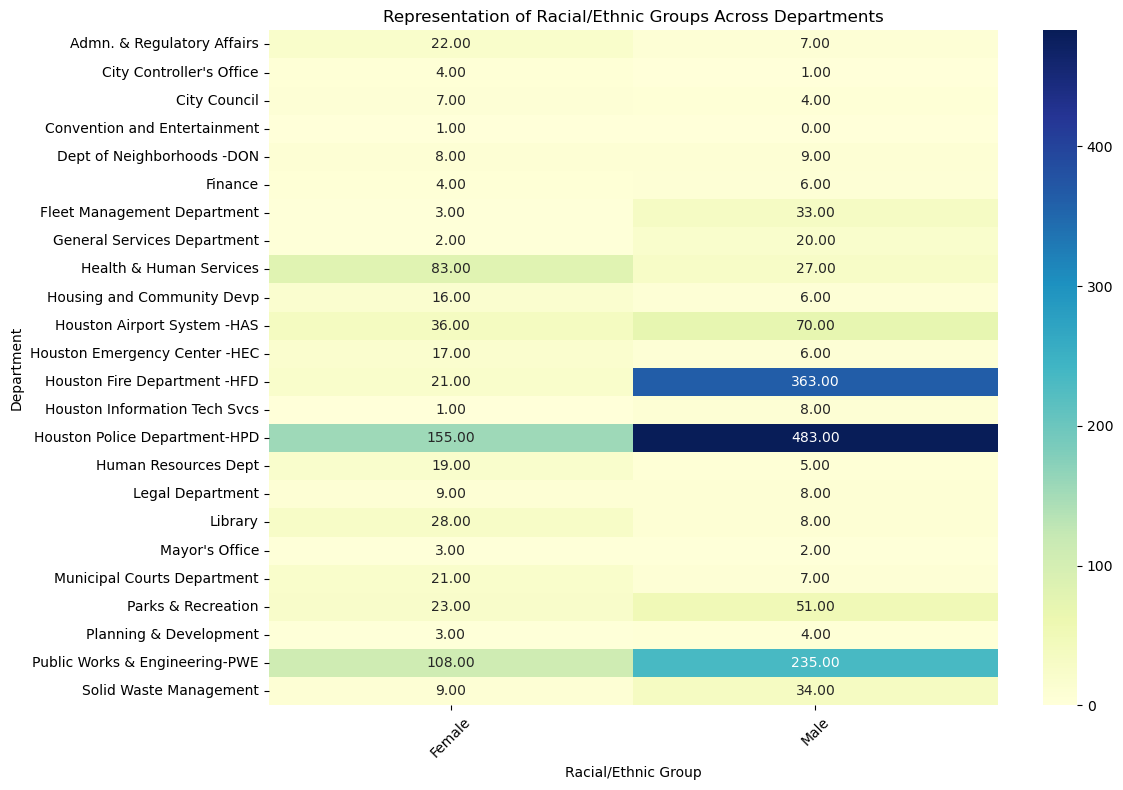

In [ ]:
plt.figure(figsize=(12, 8))
sn.heatmap(gender_representation_per_departmen, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Representation of Racial/Ethnic Groups Across Departments')
plt.xlabel('Racial/Ethnic Group')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Employment Type Distribution:

What proportion of employees are full-time, part-time, or contract workers?

In [ ]:
er['EMPLOYMENT_TYPE'].unique()

array(['Full Time', 'Part Time', 'Temporary', 'HFD Deferred Term'],
      dtype=object)

In [ ]:
employment_type = er['EMPLOYMENT_TYPE'].value_counts()

In [ ]:
employment_type

Full Time            1954
Part Time              28
Temporary               9
HFD Deferred Term       9
Name: EMPLOYMENT_TYPE, dtype: int64

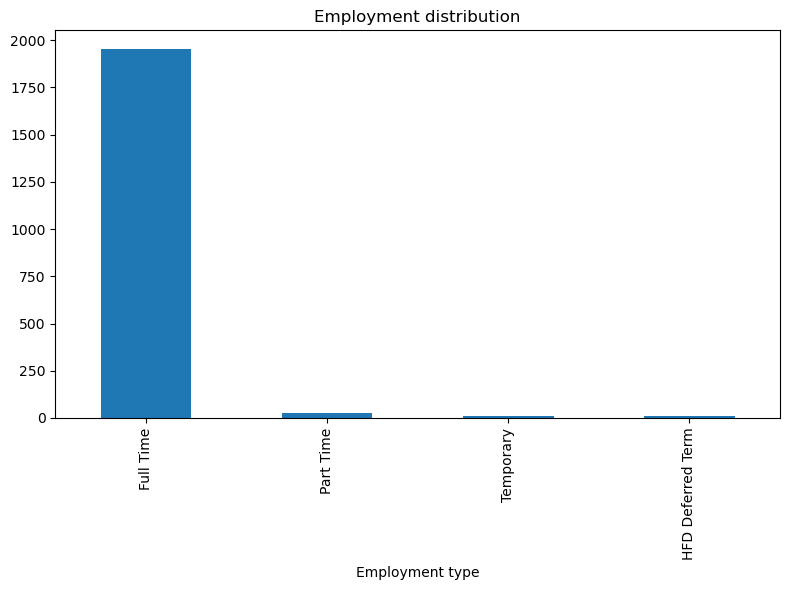

In [ ]:
plt.figure(figsize=(8, 6))
employment_type.plot(kind='bar')
plt.title('Employment distribution')
plt.xlabel('Employment type')
plt.tight_layout()
plt.show()

Are there differences in employment types across departments or positions?

In [ ]:
# Employment type across positions

In [ ]:
# Grouping employment and title
employment_type =er.groupby(['POSITION_TITLE','EMPLOYMENT_TYPE'])

In [ ]:
employment_type_dist =employment_type.size().unstack()

In [ ]:
employment_type_dist

EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Temporary
POSITION_TITLE,,,,
3-1-1 TELECOMMUNICATOR,1.0,NaN,NaN,NaN
3-1-1 TELECOMMUNICATOR SUPERVISOR,1.0,NaN,NaN,NaN
9-1-1 PSAP SUPERVISOR,2.0,NaN,NaN,NaN
9-1-1 PSAP SUPERVISOR-FIRE/EMS,1.0,NaN,NaN,NaN
9-1-1 TELECOMMUNICATOR,8.0,NaN,NaN,NaN
...,...,...,...,...
UTILITY WORKER,40.0,NaN,NaN,NaN
WATER SERVICE INSPECTOR I,3.0,NaN,NaN,NaN
WATER SERVICE INSPECTOR II,2.0,NaN,NaN,NaN


In [ ]:
employment_type_dist = employment_type_dist.fillna(0)

In [ ]:
employment_type_dist

EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Temporary
POSITION_TITLE,,,,
3-1-1 TELECOMMUNICATOR,1.0,0.0,0.0,0.0
3-1-1 TELECOMMUNICATOR SUPERVISOR,1.0,0.0,0.0,0.0
9-1-1 PSAP SUPERVISOR,2.0,0.0,0.0,0.0
9-1-1 PSAP SUPERVISOR-FIRE/EMS,1.0,0.0,0.0,0.0
9-1-1 TELECOMMUNICATOR,8.0,0.0,0.0,0.0
...,...,...,...,...
UTILITY WORKER,40.0,0.0,0.0,0.0
WATER SERVICE INSPECTOR I,3.0,0.0,0.0,0.0
WATER SERVICE INSPECTOR II,2.0,0.0,0.0,0.0


In [ ]:
# Employment type across department

In [ ]:
employment_type =er.groupby(['DEPARTMENT','EMPLOYMENT_TYPE'])

In [ ]:
employment_type_dept = employment_type.size().unstack()

In [ ]:
employment_type_dept

EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Temporary
DEPARTMENT,,,,
Admn. & Regulatory Affairs,29.0,NaN,NaN,NaN
City Controller's Office,5.0,NaN,NaN,NaN
City Council,9.0,NaN,2.0,NaN
Convention and Entertainment,1.0,NaN,NaN,NaN
Dept of Neighborhoods -DON,17.0,NaN,NaN,NaN
Finance,10.0,NaN,NaN,NaN
Fleet Management Department,36.0,NaN,NaN,NaN
General Services Department,22.0,NaN,NaN,NaN
Health & Human Services,106.0,NaN,4.0,NaN


In [ ]:
employment_type_dept.fillna(0)

EMPLOYMENT_TYPE,Full Time,HFD Deferred Term,Part Time,Temporary
DEPARTMENT,,,,
Admn. & Regulatory Affairs,29.0,0.0,0.0,0.0
City Controller's Office,5.0,0.0,0.0,0.0
City Council,9.0,0.0,2.0,0.0
Convention and Entertainment,1.0,0.0,0.0,0.0
Dept of Neighborhoods -DON,17.0,0.0,0.0,0.0
Finance,10.0,0.0,0.0,0.0
Fleet Management Department,36.0,0.0,0.0,0.0
General Services Department,22.0,0.0,0.0,0.0
Health & Human Services,106.0,0.0,4.0,0.0


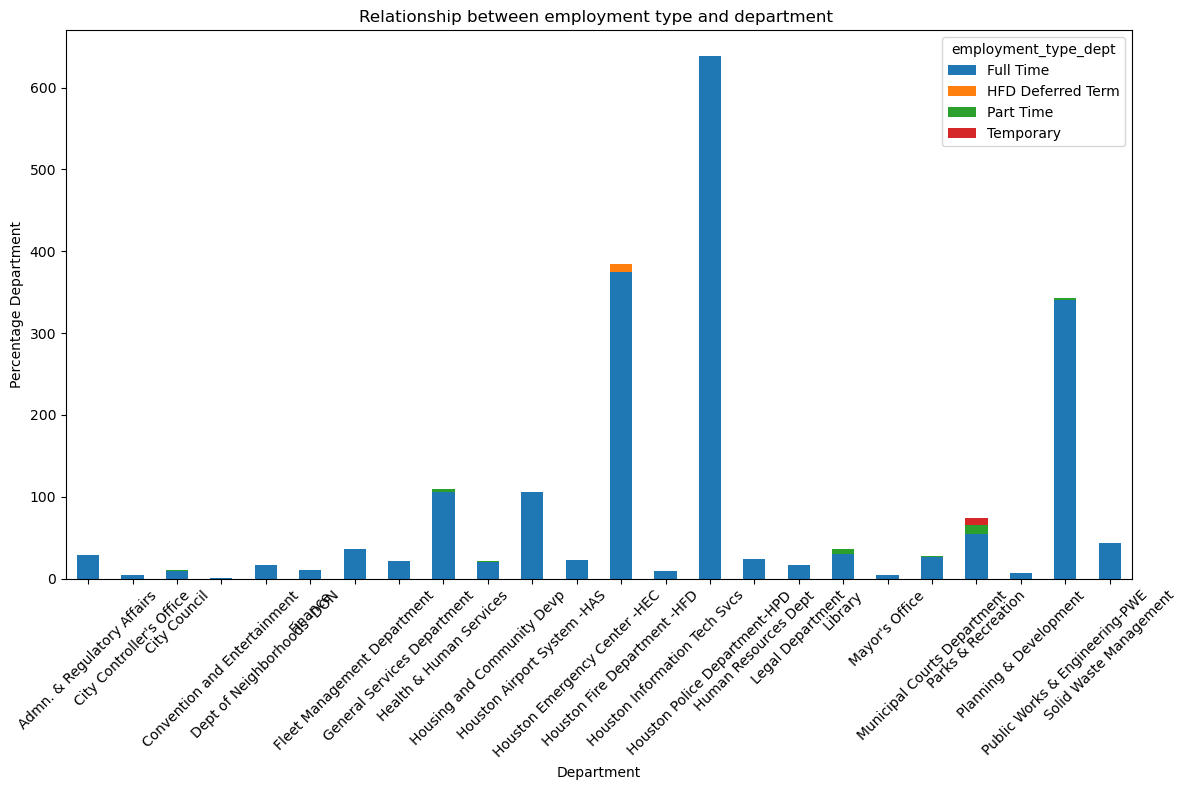

In [ ]:
employment_type_dept.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Relationship between employment type and department ')
plt.xlabel('Department')
plt.ylabel('Percentage Department')
plt.xticks(rotation=45)
plt.legend(title='employment_type_dept')
plt.tight_layout()
plt.show()

# Tenure Analysis

What is the distribution of employee tenure (length of employment) within the organization?

In [ ]:
er['EMPLOYMENT_STATUS'].unique()

array(['Active', 'Inactive'], dtype=object)

In [ ]:
inactive_df = er[er['EMPLOYMENT_STATUS'] == 'Inactive']

In [ ]:
inactive_df

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
374,374,ENGINEER OPERATOR,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,10/5/1979,11/9/1991
568,568,CAPTAIN,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,9/8/1981,11/30/2013
651,651,DISTRICT CHIEF,Houston Fire Department -HFD,0.0,Hispanic/Latino,HFD Deferred Term,Male,Inactive,10/13/1975,1/25/1997
1057,1057,FIRE FIGHTER,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,8/27/1979,5/10/2015
1134,1134,ASSISTANT FIRE CHIEF,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,3/27/1978,9/14/2013
1251,1251,CAPTAIN,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,12/19/1977,6/4/2013
1294,1294,CAPTAIN,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,3/8/1982,3/30/2002
1385,1385,CAPTAIN,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,8/25/1980,2/2/2002
1653,1653,DISTRICT CHIEF,Houston Fire Department -HFD,0.0,White,HFD Deferred Term,Male,Inactive,1/26/1981,3/27/2004


In [ ]:


# Convert 'HIRE_DATE' to datetime format
inactive_df['HIRE_DATE'] = pd.to_datetime(inactive_df['HIRE_DATE'])

# Calculate tenure (length of employment)
latest_job_date = pd.to_datetime('5/10/2015')  # Use today's date as the current date
inactive_df['Tenure'] = (latest_job_date - inactive_df['HIRE_DATE']).dt.days / 365  # Calculate tenure in years


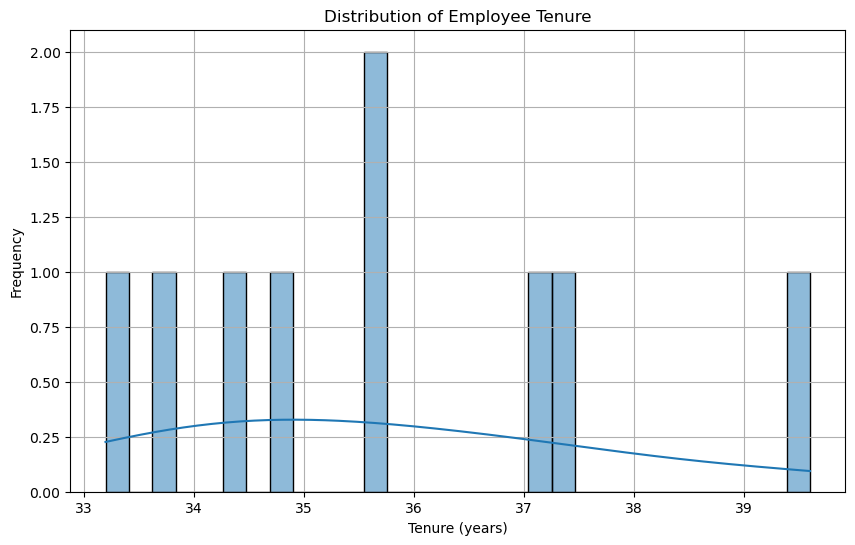

In [ ]:
# Tenure Distribution
plt.figure(figsize=(10, 6))
sn.histplot(inactive_df['Tenure'], bins=30, kde=True)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



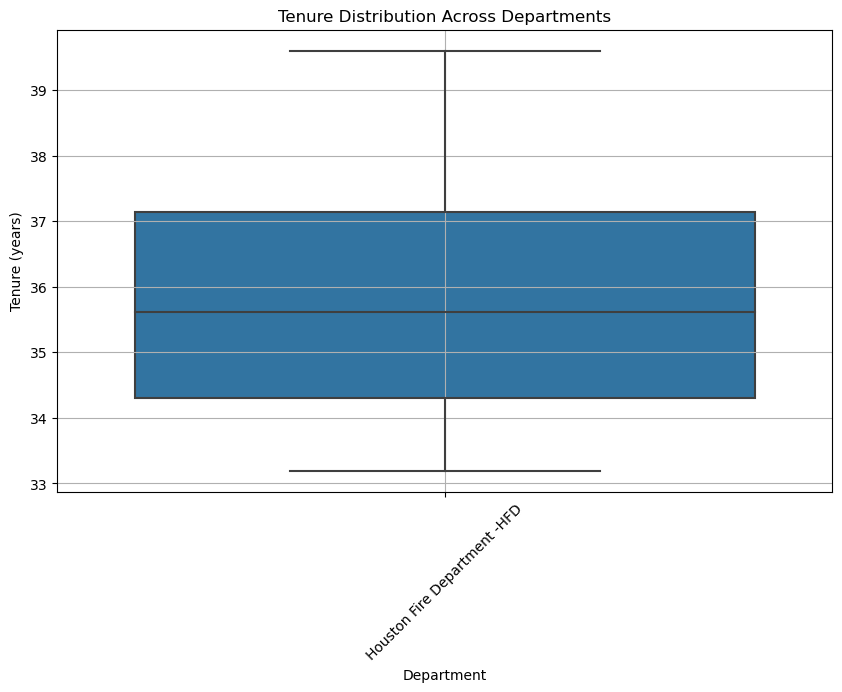

In [ ]:
# Compare Tenure Across Demographic Groups
plt.figure(figsize=(10, 6))
sn.boxplot(x='DEPARTMENT', y='Tenure', data=inactive_df)
plt.title('Tenure Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Tenure (years)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# Salary Distribution

In [ ]:

# Compute descriptive statistics
mean_salary = er['BASE_SALARY'].mean()
mode_salary = er['BASE_SALARY'].mode()[0]  # Mode returns a Series, so we get the first value
median_salary = er['BASE_SALARY'].median()

# Print descriptive statistics
print(f"Mean Salary: {mean_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Median Salary: {median_salary}")



Mean Salary: 52589.1595
Mode Salary: 66614.0
Median Salary: 52514.0


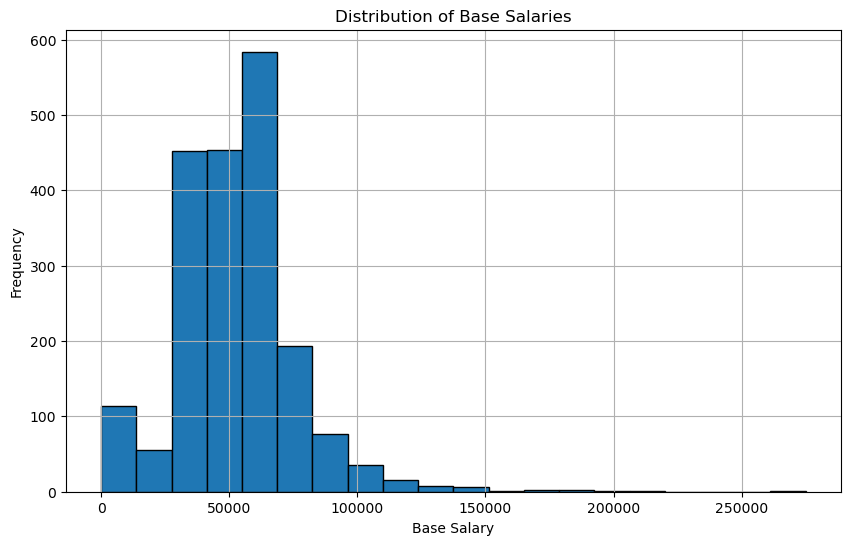

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(er['BASE_SALARY'], bins=20, edgecolor='black')
plt.title('Distribution of Base Salaries')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




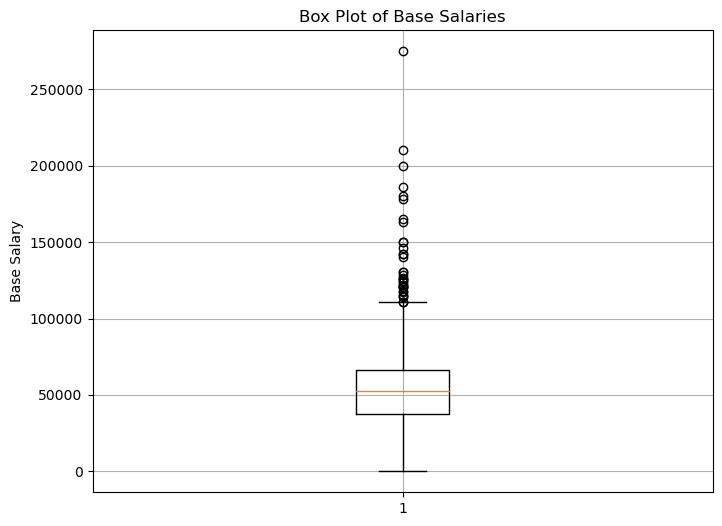

In [ ]:
# Visualize the distribution of base salaries using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(er['BASE_SALARY'])
plt.title('Box Plot of Base Salaries')
plt.ylabel('Base Salary')
plt.grid(True)
plt.show()

# Salary Disparities:

In [ ]:
# Descriptive Analysis
salary_stats = er.groupby(['RACE', 'GENDER'])['BASE_SALARY'].describe()
salary_stats



count          mean           std  \
RACE                           GENDER                                      
American Indian/Alaskan Native Female    6.0  50199.000000  34173.590335   
                               Male      5.0  60305.400000  22112.063196   
Asian/Pacific Islander         Female   30.0  63226.300000  27256.681947   
                               Male     77.0  59448.610390  26045.493259   
Black/African American         Female  305.0  46830.501639  21122.897855   
                               Male    395.0  48883.605063  24825.171417   
Hispanic/Latino                Female  139.0  45499.647482  19701.612298   
                               Male    341.0  52373.017595  20321.076579   
NA                             Female   14.0  29906.285714  17232.931901   
                               Male     21.0  33391.761905  17984.307971   
Others                         Female    1.0  63785.000000           NaN   
                               Male      1.0  38771.000000           NaN   
White                          Female  108.0  63082.611111  30347.180160   
                               Male    557.0  57971.087971  26351.484692   

                                           min       25%      50%       75%  \
RACE                           GENDER                                         
American Indian/Alaskan Native Female      0.0  31938.50  54117.0  65938.00   
                               Male    26125.0  55461.00  60347.0  78355.00   
Asian/Pacific Islander         Female  26125.0  43133.75  57227.5  78032.75   
                               Male        0.0  45279.00  55461.0  66614.00   
Black/African American         Female      0.0  33550.00  42702.0  58396.00   
                               Male        0.0  34424.00  45279.0  61327.00   
Hispanic/Latino                Female      0.0  32489.50  42640.0  53040.00   
                               Male        0.0  41080.00  52644.0  63166.00   
NA                             Female      0.0  29374.50  33082.5  42000.00   
                               Male        0.0  28024.00  30410.0  36400.00   
Others                         Female  63785.0  63785.00  63785.0  63785.00   
                               Male    38771.0  38771.00  38771.0  38771.00   
White                          Female      0.0  45483.75  61548.5  76313.75   
                               Male        0.0  48190.00  61921.0  66614.00   

                                            max  
RACE                           GENDER            
American Indian/Alaskan Native Female   98536.0  
                               Male     81239.0  
Asian/Pacific Islander         Female  130416.0  
                               Male    163228.0  
Black/African American         Female  150416.0  
                               Male    275000.0  
Hispanic/Latino                Female  126115.0  
                               Male    165216.0  
NA                             Female   49400.0  
                               Male     80002.0  
Others                         Female   63785.0  
                               Male     38771.0  
White                          Female  178331.0  
                               Male    210588.0

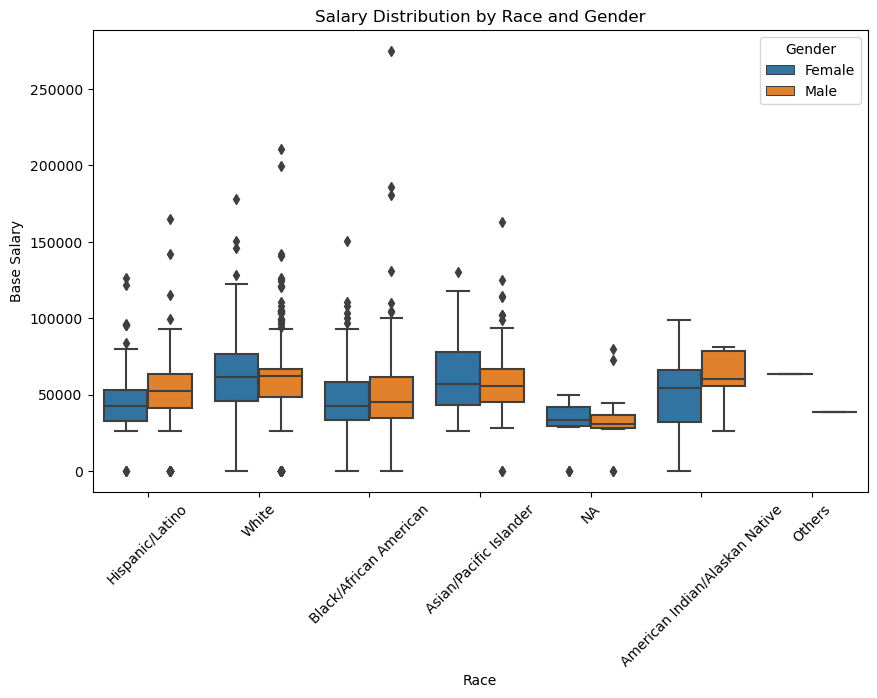

In [ ]:
# Visualization - Box Plot
plt.figure(figsize=(10, 6))
sn.boxplot(x='RACE', y='BASE_SALARY', hue='GENDER', data=er)
plt.title('Salary Distribution by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Base Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()



# Salary by Department/Position:

In [ ]:

# Calculate average salary by department
avg_salary_by_department = er.groupby('DEPARTMENT')['BASE_SALARY'].mean().sort_values(ascending=False)
print("Average Salary by Department:")
avg_salary_by_department




Average Salary by Department:


DEPARTMENT
Legal Department                  104959.529412
Mayor's Office                     86489.600000
Finance                            79650.300000
Houston Information Tech Svcs      76112.777778
Houston Fire Department -HFD       57358.544271
Human Resources Dept               56311.833333
Housing and Community Devp         55807.000000
City Controller's Office           55711.600000
Planning & Development             54879.571429
Houston Police Department-HPD      54317.217868
Houston Airport System -HAS        53956.066038
General Services Department        51295.818182
Admn. & Regulatory Affairs         50890.551724
Public Works & Engineering-PWE     49915.049563
Municipal Courts Department        49906.428571
Health & Human Services            49440.263636
City Council                       48345.727273
Dept of Neighborhoods -DON         47092.882353
Houston Emergency Center -HEC      46415.739130
Fleet Management Department        43994.305556
Solid Waste Management       

In [ ]:
# Calculate average salary by position title
avg_salary_by_position = er.groupby('POSITION_TITLE')['BASE_SALARY'].mean().sort_values(ascending=False)
print("\nAverage Salary by Position Title:")
avg_salary_by_position


Average Salary by Position Title:


POSITION_TITLE
CITY ATTORNEY                               275000.0
ASSOCIATE EMS PHYSICIAN DIRECTOR,MD         210588.0
DEPUTY DIRECTOR-FINANCE & ADMINISTRATION    199596.0
DEPUTY DIRECTOR-AVIATION (EX LVL)           186192.0
CHIEF PHYSICIAN,MD                          180416.0
                                              ...   
ENGINEER OPERATOR                                0.0
HEAD LIFEGUARD                                   0.0
SENIOR PUBLIC HEALTH DENTIST,DDS                 0.0
LIFEGUARD                                        0.0
PARK MAINTENANCE AIDE                            0.0
Name: BASE_SALARY, Length: 330, dtype: float64